In [28]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error
from sklearn.datasets import make_circles, load_boston
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier

%pylab inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6

np.random.seed(42)

Populating the interactive namespace from numpy and matplotlib


/home/amir/venv/ds_venv3.6/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
def print_dec_plot(MODEL, title="Дерево решений"):
    x_range = np.linspace(X.min(), X.max(), 100)
    xx1, xx2 = np.meshgrid(x_range, x_range)
    y_hat = MODEL.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contourf(xx1, xx2, y_hat, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
    plt.title(title)
    plt.show()

In [30]:
X, y = make_circles(n_samples=100, factor=0.1, noise=0.35, random_state=42)
X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(X, y, test_size=0.2)

0.6785714285714286


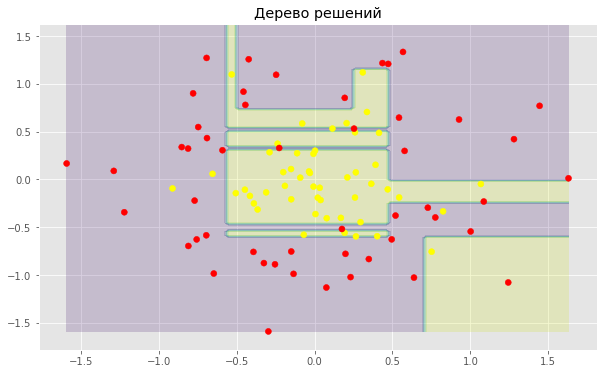

In [31]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_circles, y_train_circles)
print( roc_auc_score(y_test_circles, dtree.predict_proba(X_test_circles)[:, 1]) )

print_dec_plot(dtree, "Дерево решений")

In [32]:
dtree.decision_path(X_train_circles[:1, :]).toarray()

array([[1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

##### Давайте обучим простой RandomForest

0.6785714285714286


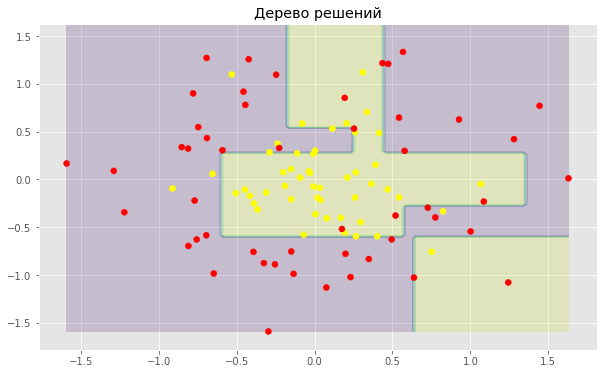

0.7559523809523809


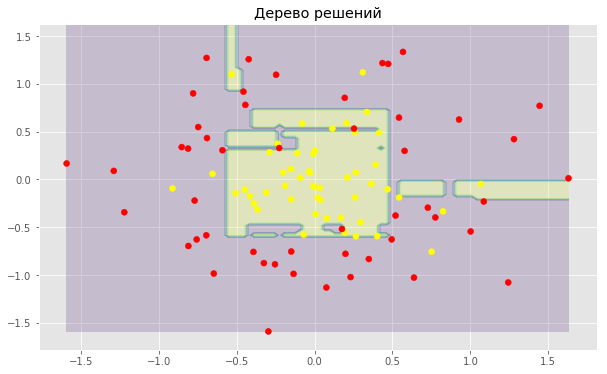

0.8511904761904762


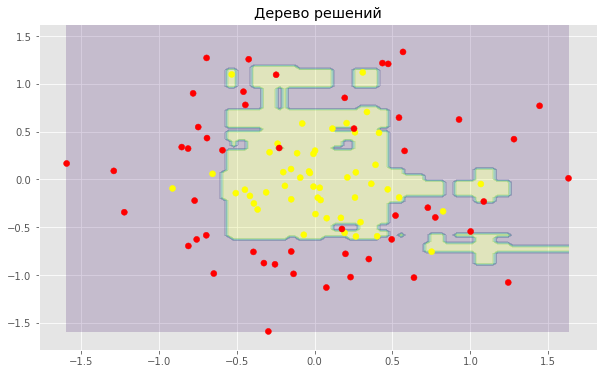

0.7857142857142858


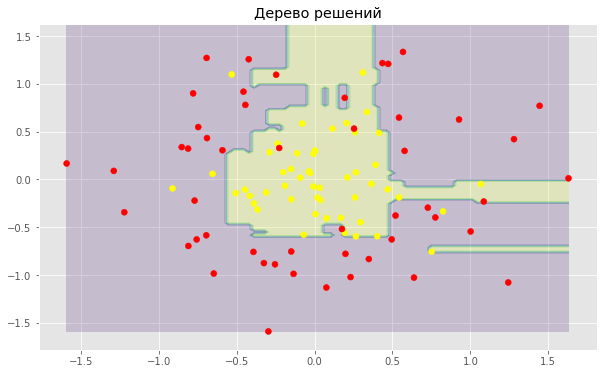

0.8452380952380952


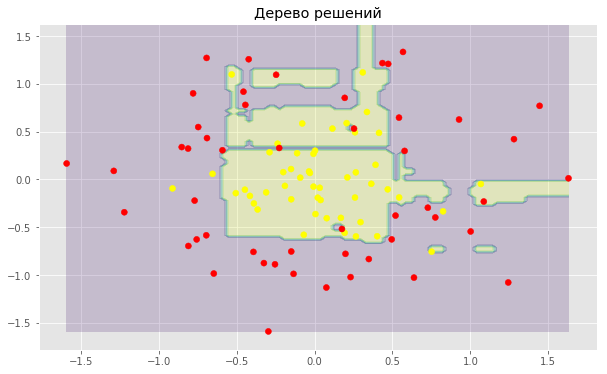

0.8571428571428572


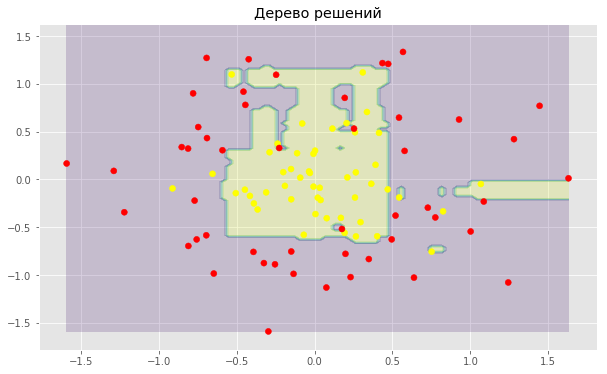

0.8035714285714286


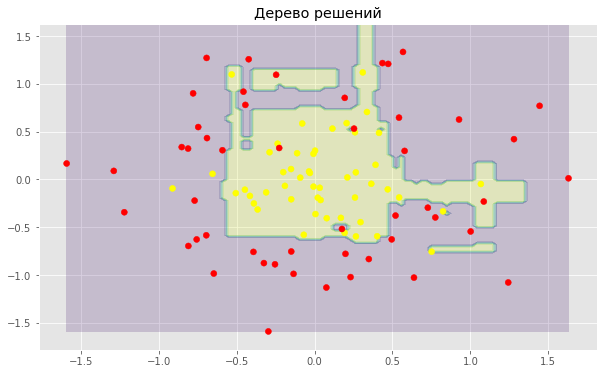

0.886904761904762


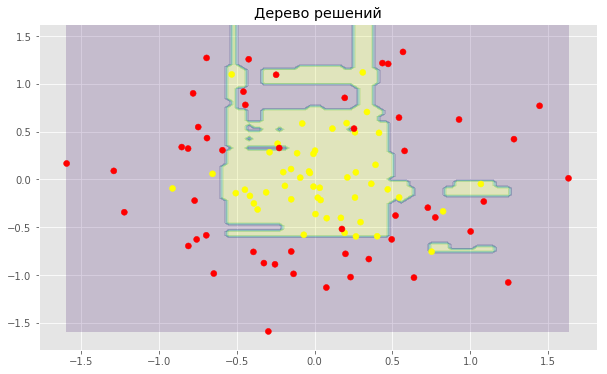

0.8333333333333334


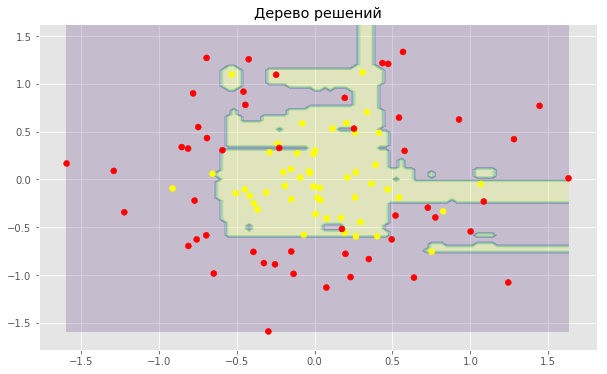

0.8035714285714286


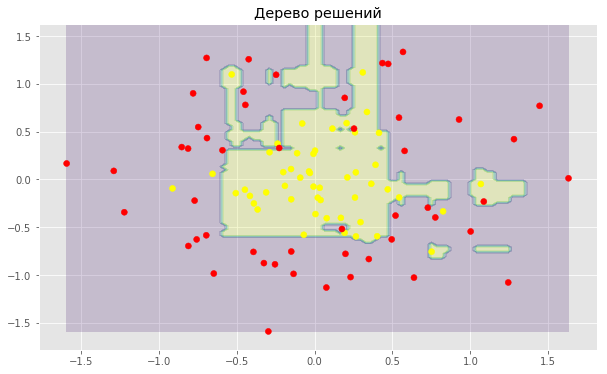

In [33]:
for i in range(1, 50, 5):
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train_circles, y_train_circles)
    print( roc_auc_score(y_test_circles, clf.predict_proba(X_test_circles)[:, 1]) )

    print_dec_plot(clf, "Дерево решений")

In [34]:
#Давайте посмотрим как меняется качество на тесте в завимисомти от параметров. 
#n_estimators, max_features, min_samples_split, min_samples_leaf, max_depth

In [36]:
train_loss = []
test_loss = []

for i in range(1, 100, 5):
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train_circles, y_train_circles)
    train_loss.append(roc_auc_score(y_train_circles, clf.predict_proba(X_train_circles)[:, 1]))
    test_loss.append(roc_auc_score(y_test_circles, clf.predict_proba(X_test_circles)[:, 1]))

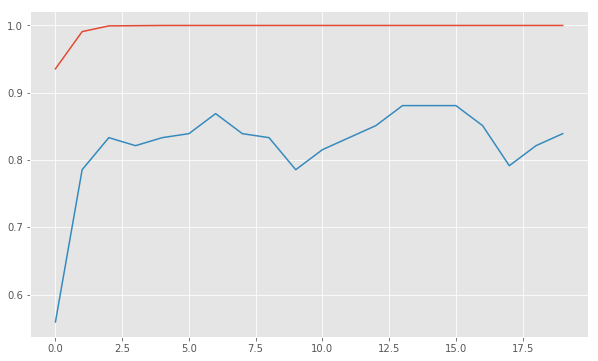

In [37]:
plt.plot(train_loss, label='train')
plt.plot(test_loss, label='test')

In [57]:
test_score = []

for i in range(1, 900, 50):
    clf = RandomForestClassifier(n_estimators=i)
    a = cross_val_score(clf, X, y, cv=10)
    test_score.append(a)

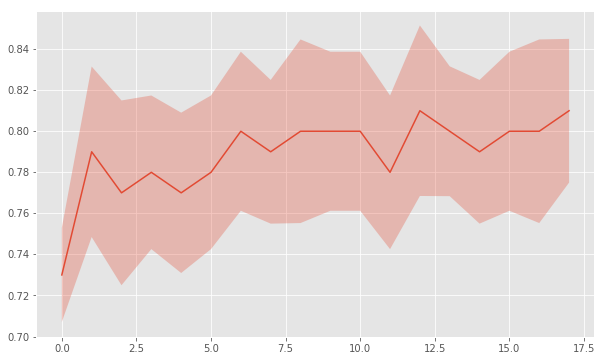

In [58]:
plt.plot([np.mean(i) for i in test_score])


plt.fill_between([i for i in range(len(test_score))], 
                 [np.mean(i) + np.std(i) / 2 for i in test_score], 
                 [np.mean(i) - np.std(i) / 2 for i in test_score], alpha = 0.3)

##### Regression

In [21]:
boston = load_boston()
y = boston['target']
X = boston['data']
kf = KFold(n_splits=5, shuffle=True, random_state=17)

for train_index, test_index in kf.split(y):
    rf_model = RandomForestRegressor()
    rf_model.fit(X[train_index],y[train_index])
    predictions = rf_model.predict(X[test_index])
    actuals = y[test_index]
    print(mean_squared_error(actuals, predictions))

10.21680098039216
10.635742574257428
20.203350495049502
8.483748514851483
8.712484158415837
